In [ ]:
# Numpy y pandas 
import numpy as np
import pandas as pd

# Scikit-Learn para ajustar los modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Para poder graficar en el notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Parametros por defecto para los plots
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.titlesize'] = 16
matplotlib.rcParams['figure.figsize'] = [9, 7]

In [ ]:

# Seteamos la semilla aleatoria
np.random.seed(42)

# "True" funcion que representa un proceso del mundo real
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x e y value con un pequeño ruido aleatorio
x = np.sort(np.random.rand(120))

y = true_gen(x) + 0.1 * np.random.randn(len(x))

In [ ]:
# Se generan indices aleatorios para crear conjuntos de entrenamiento y prueba
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

# Observaciones de entrenamiento y prueba
train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Modelo de la 'funcion real'
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

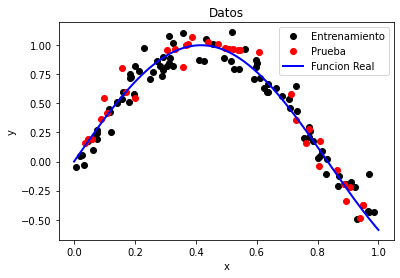

In [ ]:
# Visualiza las observaciones y la 'funcion real'
plt.plot(train, y_train, 'ko', label = 'Entrenamiento'); 
plt.plot(test, y_test, 'ro', label = 'Prueba')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'Funcion Real')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Datos');

In [ ]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Crea una transformacion polinomial de las variables
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape variables de entrenamiento para uso en scikit-learn variables de transformacion
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Crea un modelo de regresion lineal y entrenamiento
    model = LinearRegression()
    model.fit(train_trans, y_train)
    
    # Calcula el score de la validacion cruzada
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)
    
    # Predicciones de entrenamiento y error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions)
    
    # Formatea variables de prueba
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Prueba conjunto de predicciones y error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Encuentra la curva real y la curva del modelo
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Curva del Modelo
    model_curve = model.predict(x_curve_trans)
    
    # Curva Real
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plotea las observaciones, 'funcion real', y funcion del modelo predictivo
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observaciones')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'Funcion Real')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Funcion Modelo')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Grado del Modelo en la Data de Entrenamiento'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plotea las observaciones de prueba y predicciones de prueba
        plt.plot(test, y_test, 'o', label = 'Observaciones de Prueba')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'Funcion Real')
        plt.plot(test, test_predictions, 'ro', label = 'Predicciones de Prueba')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Grado del Modelo en la Data de Prueba'.format(degrees)), plt.show();
    
    # Retorna la metrica
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

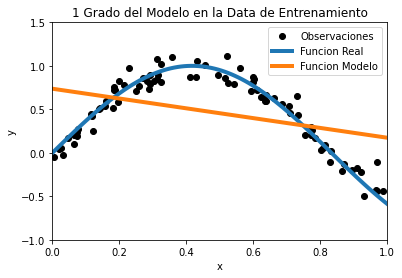

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

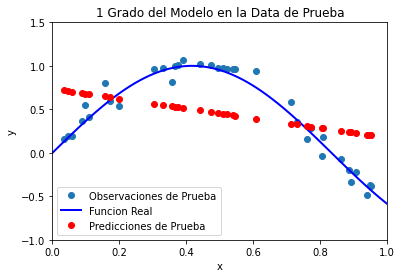

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

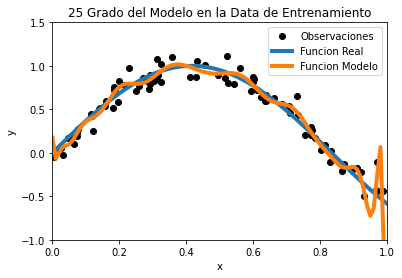

In [ ]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 25)

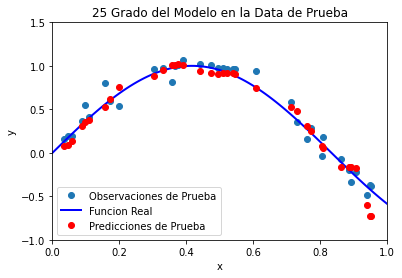

In [ ]:
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')

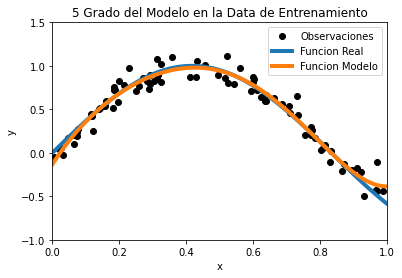

In [ ]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 5)

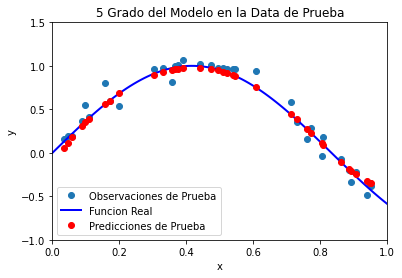

In [ ]:
fit_poly(train, y_train, test, y_test, degrees=5, plot='test')

In [ ]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Dataframe con los resultados
results = pd.DataFrame(0, columns = ['train_error', 'test_error', 'cross_valid'], index = degrees)

# Probar todos los grados para el modelo y grabar los resultados
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]
    results.loc[degree, 'cross_valid'] = degree_results[2]

In [ ]:
print('10 Mas bajos errores de Validacion Cruzada\n')
train_eval = results.sort_values('cross_valid').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'cross_valid']] .head(10)

10 Mas bajos errores de Validacion Cruzada



,degrees,cross_valid
0,4,0.010549
1,5,0.010637
2,7,0.010665
3,6,0.010887
4,8,0.011182
5,3,0.011695
6,9,0.011757
7,11,0.011769
8,10,0.011902
9,12,0.012642


El minimo error de validacion cruzada ocurre en 3 grados.



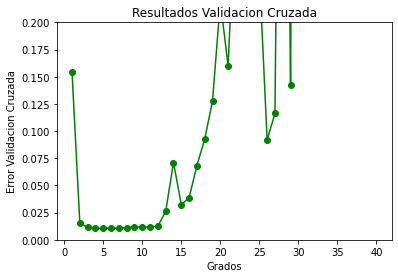

In [ ]:
plt.plot(results.index, results['cross_valid'], 'go-', ms=6)
plt.xlabel('Grados'); plt.ylabel('Error Validacion Cruzada'); plt.title('Resultados Validacion Cruzada');
plt.ylim(0, 0.2);
print('El minimo error de validacion cruzada ocurre en {} grados.\n'.format(int(np.argmin(results['cross_valid']))))

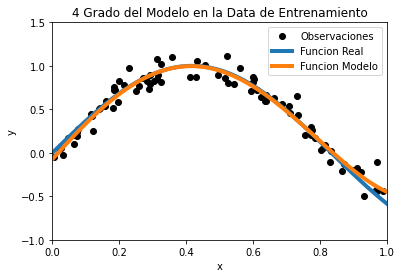

In [ ]:
fit_poly(train, y_train, test, y_test, degrees=4, plot='train')

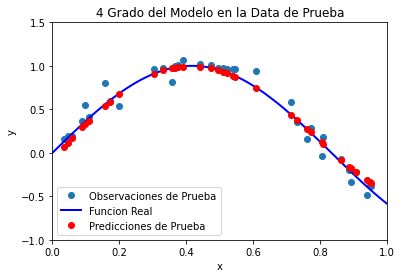

In [ ]:
fit_poly(train, y_train, test, y_test, degrees=4, plot='test')

In [ ]:
print('10 Mas Bajos Errores de Entrenamiento\n')
train_eval = results.sort_values('train_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'train_error']] .head(10)

10 Mas Bajos Errores de Entrenamiento



,degrees,train_error
0,36,0.006137
1,35,0.006151
2,40,0.006213
3,39,0.006269
4,31,0.006359
5,27,0.006406
6,32,0.006416
7,28,0.006430
8,33,0.006442
9,29,0.006468


In [ ]:
print('10 Mas Bajos Errores de Prueba\n')
train_eval = results.sort_values('test_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'test_error']] .head(10)

10 Mas Bajos Errores de Prueba



,degrees,test_error
0,5,0.009482
1,6,0.010215
2,4,0.010483
3,8,0.010609
4,7,0.010618
5,9,0.010754
6,14,0.011216
7,10,0.011321
8,11,0.011342
9,13,0.011387


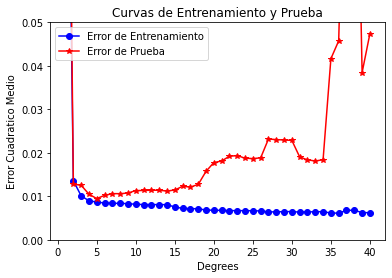


Minimo Error de Entrenamiento ocurre a 35 grados.
Minimo Error de Prueba ocurre a 4 grados.



In [ ]:
plt.plot(results.index, results['train_error'], 'b-o', ms=6, label = 'Error de Entrenamiento')
plt.plot(results.index, results['test_error'], 'r-*', ms=6, label = 'Error de Prueba')
plt.legend(loc=2); plt.xlabel('Degrees'); plt.ylabel('Error Cuadratico Medio'); plt.title('Curvas de Entrenamiento y Prueba');
plt.ylim(0, 0.05); plt.show()

print('\nMinimo Error de Entrenamiento ocurre a {} grados.'.format(int(np.argmin(results['train_error']))))
print('Minimo Error de Prueba ocurre a {} grados.\n'.format(int(np.argmin(results['test_error']))))

**Train/Test Split and Cross Validation**

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [31]:
# Cargamos el dataset de Diabetes
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declaramos los nombres de columnas
diabetes = datasets.load_diabetes() 
df = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target # definimos la variable target (variable dependiente) como y

In [14]:

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
y_train

(353, 10) (353,)
(89, 10) (89,)


array([ 25.,  91., 259.,  71.,  85., 249.,  48., 196.,  72., 174., 170.,
       217., 221., 190., 346.,  77., 200., 110., 116., 102., 170., 122.,
       141.,  52., 321., 102.,  39.,  75.,  48., 214., 109., 160., 242.,
       153., 111., 258., 283., 158., 237.,  97.,  53., 142., 178., 225.,
       220., 202., 129.,  84., 139., 222.,  72., 166., 163., 115., 268.,
       141.,  96.,  90., 279., 179., 184., 182., 162., 235., 127.,  70.,
       229.,  49., 311.,  55.,  52., 241., 170., 303., 181., 131., 181.,
       259., 101., 268.,  51.,  87.,  54.,  55., 185., 252., 233., 150.,
       129., 200., 111., 195.,  53.,  65.,  31.,  75.,  69., 214., 150.,
       292., 145., 206., 104.,  90., 263.,  90., 201.,  73., 131., 275.,
        63., 244., 168., 219., 259.,  52.,  61., 217., 143.,  94., 202.,
       125., 107.,  55.,  83., 114., 198., 144., 296., 275.,  39., 258.,
       216.,  72.,  90.,  88.,  91.,  58.,  97., 154.,  40.,  51., 177.,
       103., 116., 136., 242., 151., 173., 272., 27

In [7]:
# fit un modelo
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
predictions[0:5]

array([103.74387291, 133.36013137, 150.03947553, 122.9921399 ,
       161.87602251])

Text(0, 0.5, 'Predicciones')

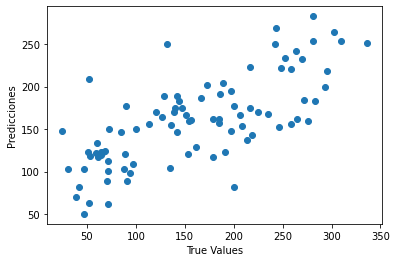

In [10]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicciones")

In [12]:
print ("Score:", model.score(X_test, y_test))
Score: 0.485829586737

Score: 0.5117202030896277


**Cross Validation**

Hasta ahora lo realizado fue, cargamos los datos, se dividieron en un conjunto de entrenamiento y prueba, se uso un modelo de regresión sobre los datos de entrenamiento, hicimos predicciones basadas en estos datos y probamos las predicciones en los datos de la prueba. 

Pero debemos considerar que la división de Train/Test tiene sus peligros: ¿qué pasa si la división que hacemos no es aleatoria? ¿Qué pasa si un subconjunto de nuestros datos (muestra) solo tiene personas de cierto estado, empleados con un cierto nivel de ingresos pero no otros niveles de ingresos, solo mujeres o solo personas a cierta edad? (Imagine un archivo ordenado por uno de estos). ¡Esto dará como resultado el overfitting.

Para evitar esto, podemos realizar algo llamado validación cruzada. Es muy similar a la división de entrenamiento/prueba, pero se aplica a más subconjuntos. Es decir, dividimos nuestros datos en k subconjuntos y entrenamos en k-1 uno de esos subconjuntos. Lo que hacemos es mantener el último subconjunto para la prueba. Podemos hacerlo para cada uno de los subconjuntos.

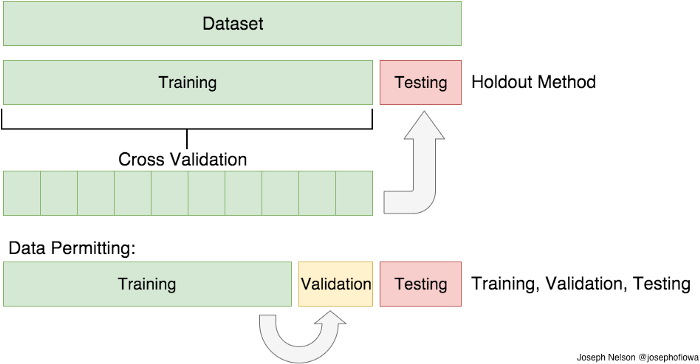

Hay muchos métodos de validación cruzada, repasaremos dos de ellos: el primero es K-Folds Cross Validation y el segundo es Leave One Out Cross Validation (LOOCV)

**K-Folds Cross Validation**

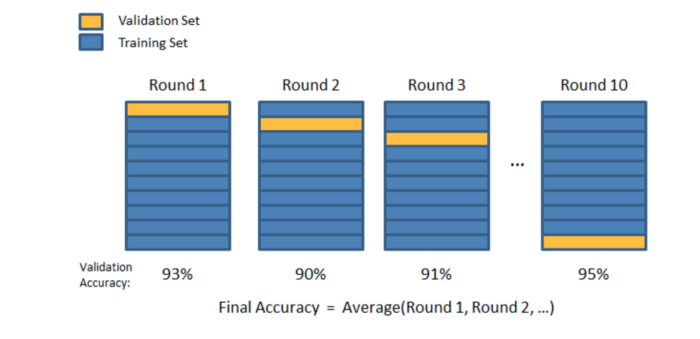


In [37]:
from sklearn.model_selection import KFold # importamos KFold
X = np.array([[1, 2, 6, 9], [3, 4, 1, 3], [1, 2, 5, 9], [3, 4, 5, 7]]) 
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4) # Define el split - en 4 folds 
kf.get_n_splits(X) # retorna el numero de iteraciones de split en el cross-validator
print(kf) 
KFold(n_splits=4, random_state=None, shuffle=False)

KFold(n_splits=4, random_state=None, shuffle=False)


KFold(n_splits=4, random_state=None, shuffle=False)

In [38]:
for train_index, test_index in kf.split(X):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
('TRAIN:', np.array([2, 3]), 'TEST:', np.array([0, 1]))
('TRAIN:', np.array([0, 1]), 'TEST:', np.array([2, 3]))

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))

**LOOCV**

Este es otro método para la validación cruzada, Leave One Out Cross Validation. En este tipo de validación cruzada, el número de folds (subconjuntos) es igual al número de observaciones que tenemos en el conjunto de datos. Luego promediamos TODOS estos folds y construimos nuestro modelo con el promedio. Luego probamos el modelo contra el último fold. Debido a que obtendríamos una gran cantidad de conjuntos de entrenamiento (igual a la cantidad de muestras), este método es muy costoso desde el punto de vista computacional y debe usarse en conjuntos de datos pequeños. Si el conjunto de datos es grande, lo más probable es que sea mejor usar un método diferente, como kfold.

In [25]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2, 6, 9], [3, 4, 1, 3], [1, 2, 5, 9], [3, 4, 5, 7]]) 
y = np.array([1, 2, 3,4])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1 2 3] TEST: [0]
[[3 4 1 3]
 [1 2 5 9]
 [3 4 5 7]] [[1 2 6 9]] [2 3 4] [1]
TRAIN: [0 2 3] TEST: [1]
[[1 2 6 9]
 [1 2 5 9]
 [3 4 5 7]] [[3 4 1 3]] [1 3 4] [2]
TRAIN: [0 1 3] TEST: [2]
[[1 2 6 9]
 [3 4 1 3]
 [3 4 5 7]] [[1 2 5 9]] [1 2 4] [3]
TRAIN: [0 1 2] TEST: [3]
[[1 2 6 9]
 [3 4 1 3]
 [1 2 5 9]] [[3 4 5 7]] [1 2 3] [4]


Entonces, ¿qué método debemos usar? ¿Cuántos folds? Pues cuantos más folds tengamos, estaremos reduciendo el error por sesgo pero aumentando el error por varianza; el precio computacional también aumentaría, obviamente: cuantos más folds tenga, más tiempo llevará calcularlo y necesitará más memoria. Con un menor número de folds, estamos reduciendo el error por varianza, pero el error por sesgo sería mayor. También sería computacionalmente más barato. Por lo tanto, en grandes conjuntos de datos, generalmente se recomienda k = 3. En conjuntos de datos más pequeños es mejor usar LOOCV.

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

df = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target

In [34]:
scores = cross_val_score(model, df, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


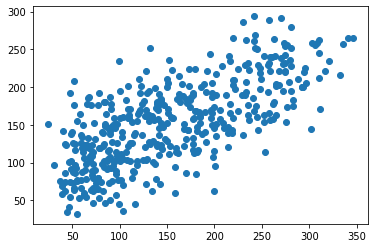

In [35]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

Podemos ver que es muy diferente del ploteo original. Son seis veces más puntos que el plot original porque usamos cv=6.

Finalmente, verifiquemos el puntaje R² del modelo (R² es un "número que indica la proporción de la varianza en la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s). Básicamente, qué tan preciso es nuestro modelo)

In [36]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640776
